In [108]:
'import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LarsCV,LassoCV,LinearRegression,LogisticRegression,ridge,GammaRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,auc,f1_score,confusion_matrix,classification_report
from statsmodels.stats import outliers_influence,regularized_covariance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



In [228]:
df=pd.read_csv(r'https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [110]:
 print("shape     ------>",df.shape)
print('Each column and data type and its count', '\n')
print(df.info())
 

shape     ------> (569, 32)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  per

In [111]:
df=df.drop(['Unnamed: 32'],axis=1)

In [112]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [113]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [114]:
print ('Belign Tumor (B) =>',df.diagnosis.value_counts()[0])
print ('Maligant Tumor (M) =>',df.diagnosis.value_counts()[1])

Belign Tumor (B) => 357
Maligant Tumor (M) => 212


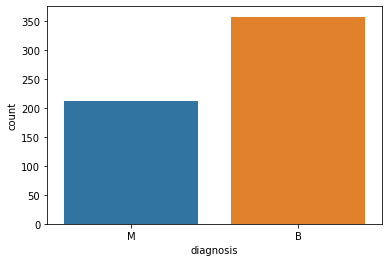

In [115]:
sns.countplot(x='diagnosis',data=df)
plt.show()

In [116]:
df.shape

(569, 31)

In [117]:
from sklearn.feature_selection import SelectKBest,f_classif

# SelectKBest use f_classif function to find best features, where f_classif uses ANOVA test


In [118]:
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

In [119]:
x=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [120]:
best_features=SelectKBest(score_func=f_classif,k=17)
fit=best_features.fit(x,y)
df_score=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

In [121]:
feature_scores=pd.concat([df_columns,df_score],axis=1)
feature_scores.columns=['Feature_Name','score']
print(feature_scores.nlargest(17,'score'))


            Feature_Name       score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586
21         texture_worst  149.596905
24      smoothness_worst  122.472880


In [122]:
new_x=df[['concave points_worst','perimeter_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst','concavity_worst','compactness_mean','compactness_worst','radius_se','perimeter_se','area_se','texture_worst','smoothness_worst']]



In [123]:
new_x

,concave points_worst,perimeter_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
id,,,,,,,,,,,,,,,,,,,
842302,0.2654,184.60,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.7119,0.27760,0.66560,1.0950,8.589,153.40,17.33,0.16220
842517,0.1860,158.80,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.2416,0.07864,0.18660,0.5435,3.398,74.08,23.41,0.12380
84300903,0.2430,152.50,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.4504,0.15990,0.42450,0.7456,4.585,94.03,25.53,0.14440
84348301,0.2575,98.87,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.6869,0.28390,0.86630,0.4956,3.445,27.23,26.50,0.20980
84358402,0.1625,152.20,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.4000,0.13280,0.20500,0.7572,5.438,94.44,16.67,0.13740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0.2216,166.10,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.4107,0.11590,0.21130,1.1760,7.673,158.70,26.40,0.14100
926682,0.1628,155.00,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.3215,0.10340,0.19220,0.7655,5.203,99.04,38.25,0.11660
926954,0.1418,126.70,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.3403,0.10230,0.30940,0.4564,3.425,48.55,34.12,0.11390


In [124]:
scalar=StandardScaler()
X_scalar=scalar.fit_transform(new_x)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=355)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [126]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[88,  5],
       [ 7, 43]], dtype=int64)

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        93
           1       0.90      0.86      0.88        50

    accuracy                           0.92       143
   macro avg       0.91      0.90      0.91       143
weighted avg       0.92      0.92      0.92       143



In [128]:
# Cross Validation 

In [129]:
# Hold Out Method
# Kfold cross validation
# Look one out cross validsation (LOOCV)

In [130]:
from sklearn.model_selection import KFold,cross_val_score

In [131]:
k_f=KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [132]:
for train,test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
    print('train :',train,'test  :', test)
  

train : [3 4 6 7 8 9] test  : [0 1 2 5]
train : [0 1 2 3 5 6 8] test  : [4 7 9]
train : [0 1 2 4 5 7 9] test  : [3 6 8]


In [133]:
cross_val_score(knn,X_scalar,y,cv=6)

array([0.96842105, 0.94736842, 0.96842105, 0.96842105, 0.96842105,
       0.96808511])

In [134]:
cross_val_score(KNeighborsClassifier(),X_scalar,y,cv=6).mean()

0.9648562896603211

In [135]:
# Hyper parameter tuning

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
param_grid={'algorithm' :['kd_tree','brute'],
           'leaf_size' :[15,18,20],
            'n_neighbors' : [3,5,7,13]}

In [138]:
gridSearchCV=GridSearchCV(estimator=knn,param_grid=param_grid)

In [139]:
gridSearchCV.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18, 20],
                         'n_neighbors': [3, 5, 7, 13]})

In [140]:
gridSearchCV.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 13}

In [141]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [142]:
y_pred=knn.predict(x_test)

In [143]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[88,  5],
       [ 7, 43]], dtype=int64)

In [144]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        93
           1       0.90      0.86      0.88        50

    accuracy                           0.92       143
   macro avg       0.91      0.90      0.91       143
weighted avg       0.92      0.92      0.92       143



In [145]:
# Visualize the data distribution and analyze the skewness of outliers

In [146]:
df_features=df.drop('diagnosis',axis=1)

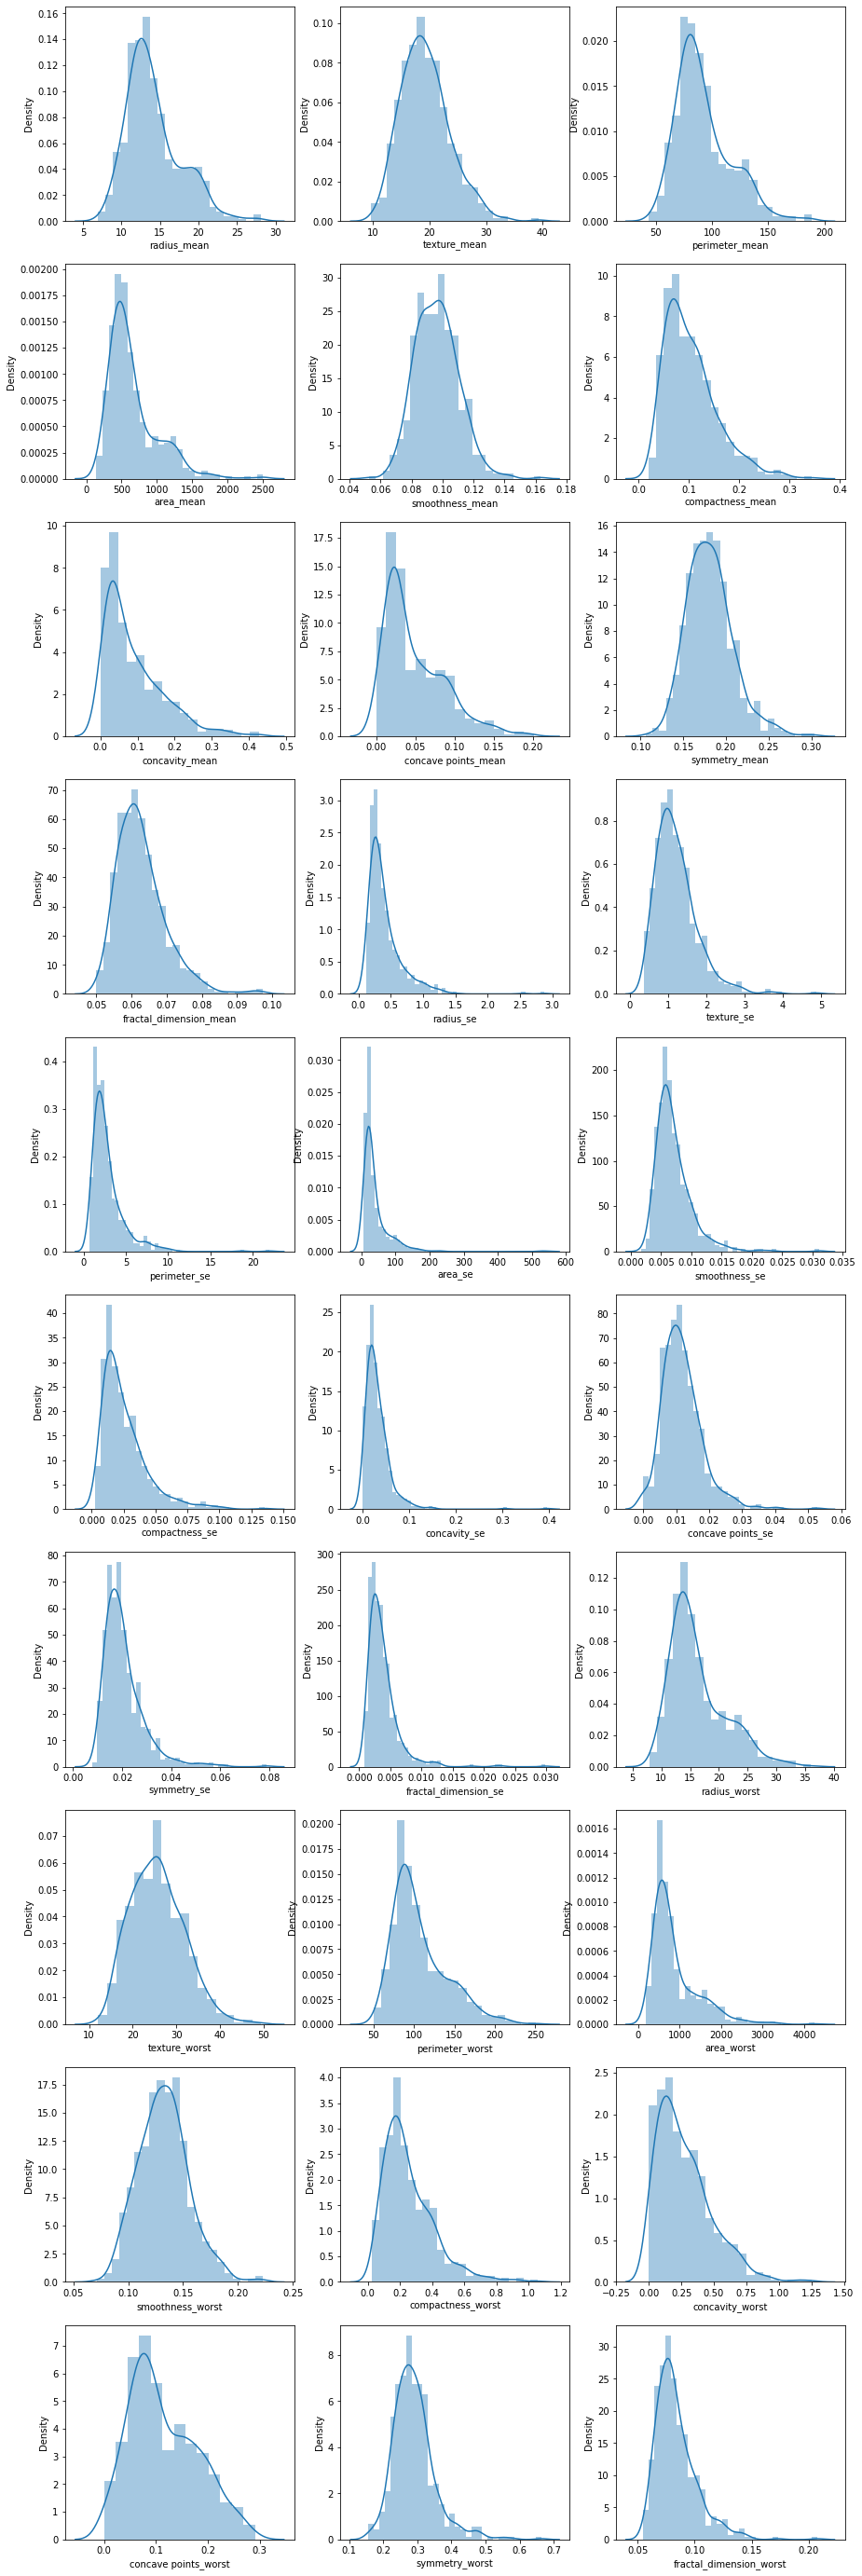

In [147]:
# data distribution

plt.figure(figsize=(15,50))
plotnumber=1

for column in df_features:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df_features[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [148]:
#Deteting Outlier with the help of boxplot and IQR

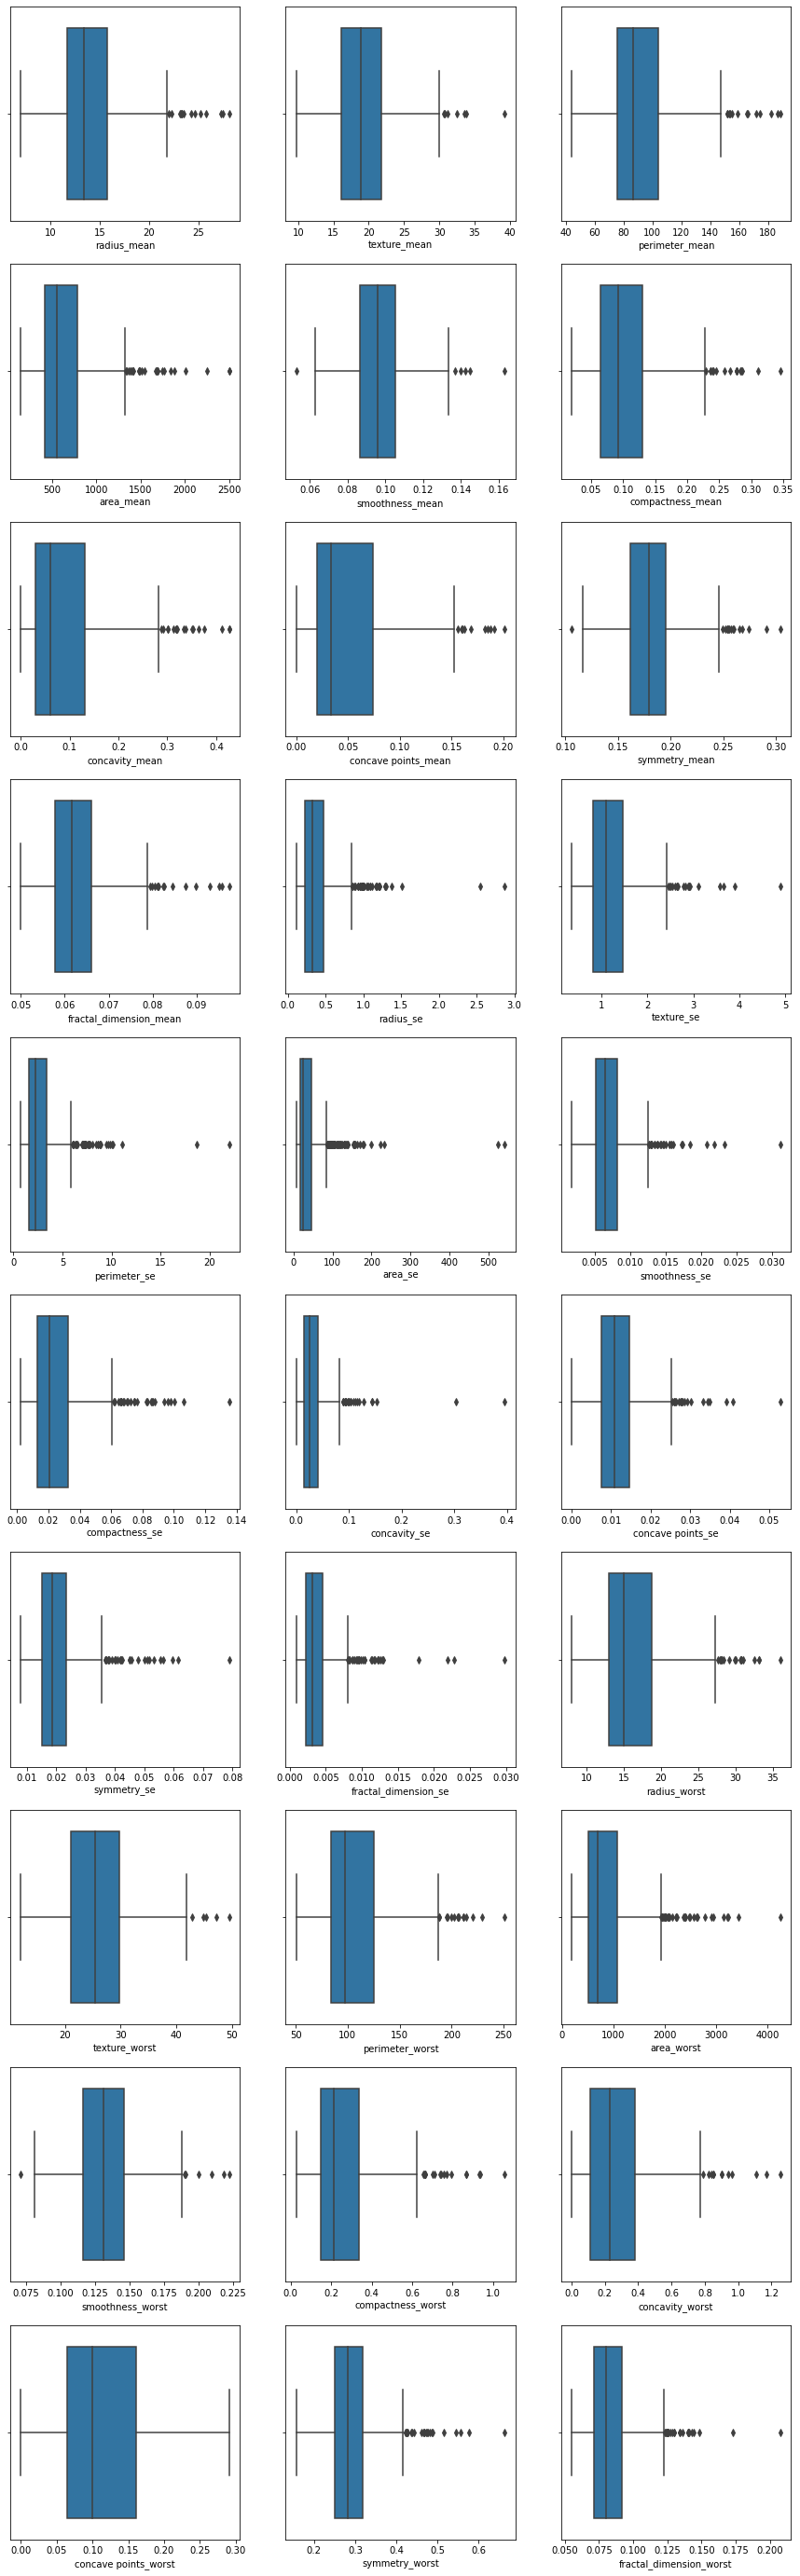

In [149]:
plt.figure(figsize=(15,50))
plotnumber=1

for column in df_features:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df_features[column],orient='V')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [150]:
#higher side ==> Q3+(1.5*IQR)
#lower side ==> Q1-(1.5*IQR)

In [151]:
#Outlier removal higher side

In [152]:


# 1st quantile

q1=df.quantile(0.25)

#3rd quantile

q3=df.quantile(0.75)

# IQR

iqr=q3-q1

In [153]:
rad_mean_high=(q3.radius_mean+(1.5*iqr.radius_mean))
rad_mean_high

21.9

In [154]:
index=np.where(df['radius_mean']>rad_mean_high)
index

(array([ 82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 369, 461, 503,
        521], dtype=int64),)

In [155]:
df=df.drop(df.index[index])

In [156]:
df.shape

(555, 31)

In [157]:
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
551,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
552,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
553,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [158]:
index=np.where(df['texture_mean']>(q3.texture_mean+(1.5*iqr.texture_mean)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
544,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
545,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
546,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [159]:
index=np.where(df['perimeter_mean']>(q3.perimeter_mean+(1.5*iqr.perimeter_mean)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
544,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
545,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
546,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [160]:
index=np.where(df['area_mean']>(q3.texture_mean+(1.5*iqr.area_mean)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
1,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
3,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.08543,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
4,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.03110,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,924964,0,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
294,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
295,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
296,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [161]:
index=np.where(df['smoothness_mean']>(q3.texture_mean+(1.5*iqr.smoothness_mean)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
1,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
2,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
3,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.08543,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
4,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.03110,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,924964,0,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
294,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
295,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
296,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [162]:
index=np.where(df['compactness_mean']>(q3.compactness_mean+(1.5*iqr.compactness_mean)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.03110,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.02076,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
4,853612,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.121800,0.05182,...,16.820,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,924964,0,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
292,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
293,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
294,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [163]:
index=np.where(df['smoothness_se']>(q3.smoothness_se+(1.5*iqr.smoothness_se)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
4,853612,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.820,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,924934,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.840,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
266,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
267,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
268,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [164]:
index=np.where(df['compactness_se']>(q3.compactness_se+(1.5*iqr.compactness_se)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
4,853612,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.820,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,924934,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.840,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
259,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
260,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
261,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [165]:
index=np.where(df['concavity_se']>(q3.concavity_se+(1.5*iqr.concavity_se)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
4,853612,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.820,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,924934,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.840,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
258,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
259,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
260,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [171]:
index=np.where(df['concave points_se']>(q3.concave points_se+(1.5*iqr.concave points_se)))
df=df.drop(df.index[index])
df.reset_index()

SyntaxError: invalid syntax (<ipython-input-171-94e2213c8ef0>, line 1)

In [172]:
index=np.where(df['symmetry_se']>(q3.symmetry_se+(1.5*iqr.symmetry_se)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
4,853612,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.820,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,924934,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.840,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
253,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
254,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
255,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [173]:
index=np.where(df['fractal_dimension_se']>(q3.fractal_dimension_se+(1.5*iqr.fractal_dimension_se)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
4,853612,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.820,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,924934,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.840,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
249,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
250,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
251,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [174]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [175]:
index=np.where(df['radius_worst']>(q3.radius_worst+(1.5*iqr.radius_worst)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
4,853612,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.820,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,924934,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.840,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
249,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
250,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
251,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [176]:
index=np.where(df['texture_worst']>(q3.texture_worst+(1.5*iqr.texture_worst)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
4,853612,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.820,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,924934,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.840,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
249,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
250,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
251,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [177]:
# Lower side outlier removal

In [178]:
index=np.where(df['smoothness_mean']<(q1.smoothness_mean-(1.5*iqr.smoothness_mean)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
1,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
4,853612,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.82,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,924632,0,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,13.89,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242
248,924934,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.84,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
249,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.49,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
250,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.48,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732


In [179]:
index=np.where(df['symmetry_mean']<(q1.symmetry_mean-(1.5*iqr.symmetry_mean)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440
1,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.54010,0.53900,0.20600,0.4378,0.10720
2,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.1312,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.9,0.1324,0.11480,0.08867,0.06227,0.2450,0.07773
4,853612,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.82,28.12,119.40,888.7,0.1637,0.57750,0.69560,0.15460,0.4761,0.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,924084,0,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,...,13.87,36.00,88.10,594.7,0.1234,0.10640,0.08653,0.06498,0.2407,0.06484
247,924632,0,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,13.89,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242
248,924934,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283
249,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.49,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969


In [180]:
index=np.where(df['smoothness_worst']<(q1.smoothness_worst-(1.5*iqr.smoothness_worst)))
df=df.drop(df.index[index])
df.reset_index()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440
1,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.54010,0.53900,0.20600,0.4378,0.10720
2,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.1312,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.9,0.1324,0.11480,0.08867,0.06227,0.2450,0.07773
4,853612,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.82,28.12,119.40,888.7,0.1637,0.57750,0.69560,0.15460,0.4761,0.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,924084,0,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,...,13.87,36.00,88.10,594.7,0.1234,0.10640,0.08653,0.06498,0.2407,0.06484
247,924632,0,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,13.89,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242
248,924934,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283
249,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.49,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969


In [181]:
best_features=SelectKBest(score_func=f_classif,k=20)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

# concate dataframesabs

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(17,'Score'))


            Feature_Name       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586
21         texture_worst  149.596905
24      smoothness_worst  122.472880


In [182]:
new_x=df[['concave points_worst','perimeter_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst','concavity_worst','compactness_mean','compactness_worst','radius_se','perimeter_se','area_se','texture_worst','smoothness_worst']]



In [183]:
new_x

,concave points_worst,perimeter_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
id,,,,,,,,,,,,,,,,,,,
843786,0.17410,103.40,103.40,0.08089,15.47,82.57,741.6,12.450,477.1,0.15780,0.53550,0.53550,0.17000,0.52490,0.3345,2.217,27.19,23.75,0.1791
844981,0.20600,106.20,106.20,0.09353,15.49,87.50,739.3,13.000,519.8,0.18590,0.53900,0.53900,0.19320,0.54010,0.3063,2.406,24.32,30.73,0.1703
8510653,0.07283,96.09,96.09,0.03110,14.50,85.63,630.5,13.080,520.0,0.04568,0.18900,0.18900,0.12700,0.27760,0.1852,1.383,14.67,20.49,0.1312
8510824,0.06227,65.13,65.13,0.02076,10.23,60.34,314.9,9.504,273.9,0.02956,0.08867,0.08867,0.06492,0.11480,0.2773,1.909,15.70,15.66,0.1324
853612,0.15460,119.40,119.40,0.05182,16.82,77.93,888.7,11.840,440.6,0.12180,0.69560,0.69560,0.15160,0.57750,0.4825,3.475,41.00,28.12,0.1637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924084,0.06498,88.10,88.10,0.01499,13.87,81.35,594.7,12.770,507.9,0.01997,0.08653,0.08653,0.04234,0.10640,0.2409,1.477,18.76,36.00,0.1234
924632,0.06493,88.84,88.84,0.02343,13.89,82.50,595.7,12.880,514.3,0.06195,0.24390,0.24390,0.05824,0.16200,0.2116,1.502,16.83,35.74,0.1227
924934,0.09127,69.57,69.57,0.02738,10.84,65.67,357.6,10.290,321.4,0.05999,0.20000,0.20000,0.07658,0.17100,0.2199,1.437,14.46,34.91,0.1384


In [184]:
scalar=StandardScaler()
X_scalar=scalar.fit_transform(new_x)

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=355)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [186]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[88,  5],
       [ 7, 43]], dtype=int64)

In [230]:
df1=df.drop(['diagnosis'],axis=1)
df1.shape

(569, 31)

In [231]:
# Z score removing outlier

In [232]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df1))
print(z)

[[1.09706398 2.07333501 1.26993369 ... 2.75062224 1.93701461        nan]
 [1.82982061 0.35363241 1.68595471 ... 0.24388967 0.28118999        nan]
 [1.57988811 0.45618695 1.56650313 ... 1.152255   0.20139121        nan]
 ...
 [0.70228425 2.0455738  0.67267578 ... 1.10454895 0.31840916        nan]
 [1.83834103 2.33645719 1.98252415 ... 1.91908301 2.21963528        nan]
 [1.80840125 1.22179204 1.81438851 ... 0.04813821 0.75120669        nan]]


In [233]:
print('Row numbers    \n',np.where(z>3)[0])
print('\n\Column numbers \n',np.where(z>3)[1])

Row numbers    
 [  0   3   3   3   3   3   3   3   3   9   9   9  12  12  12  12  12  14
  14  23  25  31  31  35  42  42  42  60  68  68  68  68  71  71  71  71
  72  78  78  78  78  78  82  82  82  82  82  82  82  83 105 105 108 108
 108 108 108 108 112 112 116 119 119 122 122 122 122 122 122 122 122 122
 122 122 122 122 122 122 138 138 146 146 146 151 151 152 152 152 152 152
 152 176 176 180 180 180 180 180 180 180 181 181 190 190 190 190 190 192
 202 203 212 212 212 212 212 212 212 213 213 213 213 213 219 219 232 236
 236 239 239 258 258 258 259 259 265 265 265 265 265 288 288 290 290 314
 314 318 323 339 339 345 351 352 352 352 352 352 352 352 352 368 368 370
 376 376 376 379 379 379 388 389 400 416 417 417 430 461 461 461 461 461
 461 461 461 461 461 461 473 503 503 503 503 503 503 504 504 505 505 521
 521 521 557 559 561 562 562 562 567 567 567 567 568]

\Column numbers 
 [ 5  4  5  9 18 24 25 28 29 25 26 29 11 12 15 17 19 25 29 23  8 28 29 28
 15 18 25  8 15 16 17 26  9 14 15 

In [234]:
index=(np.where(z>3)[0])

In [235]:
df=df.drop(df.index[index])
df.shape

(495, 32)

In [238]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [241]:
x=df.drop(['diagnosis','Unnamed: 32'],axis=1)
y=df['diagnosis']

In [242]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 842517 to 926954
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              495 non-null    float64
 1   texture_mean             495 non-null    float64
 2   perimeter_mean           495 non-null    float64
 3   area_mean                495 non-null    float64
 4   smoothness_mean          495 non-null    float64
 5   compactness_mean         495 non-null    float64
 6   concavity_mean           495 non-null    float64
 7   concave points_mean      495 non-null    float64
 8   symmetry_mean            495 non-null    float64
 9   fractal_dimension_mean   495 non-null    float64
 10  radius_se                495 non-null    float64
 11  texture_se               495 non-null    float64
 12  perimeter_se             495 non-null    float64
 13  area_se                  495 non-null    float64
 14  smoothness_se     

In [244]:
best_features=SelectKBest(score_func=f_classif,k=17)
fit=best_features.fit(x,y)
df_score=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_score],axis=1)
feature_scores.columns=['Feature_Name','score']
print(feature_scores.nlargest(17,'score'))


            Feature_Name       score
22       perimeter_worst  885.034320
20          radius_worst  851.489347
7    concave points_mean  822.656614
23            area_worst  793.749507
27  concave points_worst  765.662541
2         perimeter_mean  650.547521
6         concavity_mean  644.978361
3              area_mean  617.398450
0            radius_mean  601.236825
13               area_se  462.214659
26       concavity_worst  443.663100
10             radius_se  325.009571
12          perimeter_se  304.765782
5       compactness_mean  280.311672
25     compactness_worst  255.088911
17     concave points_se  130.577096
21         texture_worst  120.616098


In [245]:
feature_scores=pd.concat([df_columns,df_score],axis=1)
feature_scores.columns=['Feature_Name','score']
print(feature_scores.nlargest(17,'score'))

            Feature_Name       score
22       perimeter_worst  885.034320
20          radius_worst  851.489347
7    concave points_mean  822.656614
23            area_worst  793.749507
27  concave points_worst  765.662541
2         perimeter_mean  650.547521
6         concavity_mean  644.978361
3              area_mean  617.398450
0            radius_mean  601.236825
13               area_se  462.214659
26       concavity_worst  443.663100
10             radius_se  325.009571
12          perimeter_se  304.765782
5       compactness_mean  280.311672
25     compactness_worst  255.088911
17     concave points_se  130.577096
21         texture_worst  120.616098


In [247]:
new_x=df[['area_worst','perimeter_worst','radius_worst','concave points_mean','concave points_worst','perimeter_mean','concavity_mean','area_mean','radius_mean','perimeter_se','compactness_mean','compactness_worst','concave points_se','texture_worst','radius_se','perimeter_se','area_se','texture_worst']]



In [248]:
new_x

,area_worst,perimeter_worst,radius_worst,concave points_mean,concave points_worst,perimeter_mean,concavity_mean,area_mean,radius_mean,perimeter_se,compactness_mean,compactness_worst,concave points_se,texture_worst,radius_se,perimeter_se,area_se,texture_worst
id,,,,,,,,,,,,,,,,,,
842517,1956.0,158.8,24.99,0.07017,0.1860,132.90,0.08690,1326.0,20.57,3.398,0.07864,0.1866,0.01340,23.41,0.5435,3.398,74.08,23.41
84300903,1709.0,152.5,23.57,0.12790,0.2430,130.00,0.19740,1203.0,19.69,4.585,0.15990,0.4245,0.02058,25.53,0.7456,4.585,94.03,25.53
84358402,1575.0,152.2,22.54,0.10430,0.1625,135.10,0.19800,1297.0,20.29,5.438,0.13280,0.2050,0.01885,16.67,0.7572,5.438,94.44,16.67
843786,741.6,103.4,15.47,0.08089,0.1741,82.57,0.15780,477.1,12.45,2.217,0.17000,0.5249,0.01137,23.75,0.3345,2.217,27.19,23.75
844359,1606.0,153.2,22.88,0.07400,0.1932,119.60,0.11270,1040.0,18.25,3.180,0.10900,0.2576,0.01039,27.66,0.4467,3.180,53.91,27.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925292,706.7,100.2,15.30,0.04304,0.1048,91.38,0.04462,600.4,14.05,2.888,0.11260,0.2264,0.01626,33.17,0.3645,2.888,29.84,33.17
926125,1819.0,179.1,24.29,0.14740,0.2542,143.00,0.31740,1347.0,20.92,8.758,0.22360,0.4186,0.02624,29.41,0.9622,8.758,118.80,29.41
926424,2027.0,166.1,25.45,0.13890,0.2216,142.00,0.24390,1479.0,21.56,7.673,0.11590,0.2113,0.02454,26.40,1.1760,7.673,158.70,26.40


In [249]:
scalar=StandardScaler()
X_scalar=scalar.fit_transform(new_x)

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=355)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [251]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[74,  3],
       [ 9, 38]], dtype=int64)

In [252]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.89      0.96      0.92        77
           M       0.93      0.81      0.86        47

    accuracy                           0.90       124
   macro avg       0.91      0.88      0.89       124
weighted avg       0.90      0.90      0.90       124

